<a href="https://colab.research.google.com/github/Kalpesh-Nandedkar/Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - $\color{purple}{\text{Iris Flower Classification}}$**
###**Project Type - Classification**
###**By - Kalpesh B. Nandedkar**

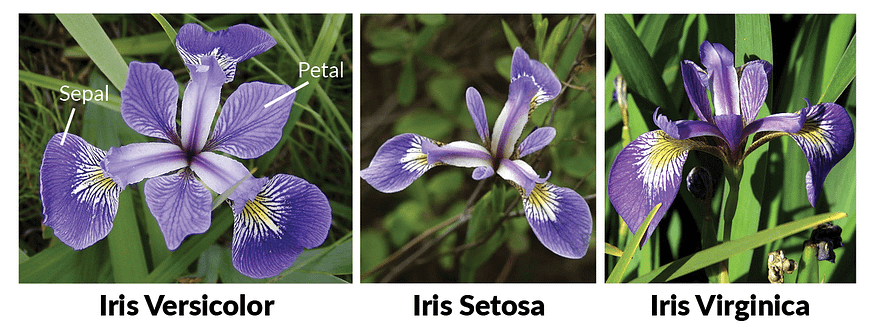

###**Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them. Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same dataset from here for the task of iris flower classification with Machine Learning.**

#**GitHub Link -**

https://github.com/Kalpesh-Nandedkar/Iris-Flower-Classification

#**Problem Statement**

The goal of this project is to develop a machine learning classifier that accurately predicts the species of the Iris flower based on its measurement specifications. The dataset consists of 150 instances of Iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The target variable is the species of the flower, which can be one of three categories: Setosa, Versicolor, and Virginica.

The project requires developing an efficient classification algorithm that can accurately classify Iris flowers into their respective species. The algorithm should be trained on a subset of the available data and then validated on a separate subset to ensure that it generalizes well to new data. The project's success will be measured based on the accuracy of the classification algorithm's predictions on the validation set.

The solution to this problem will have several practical applications, including botany, ecology, and horticulture, as it will help classify Iris flowers based on their morphological characteristics. The problem is important because accurate classification of Iris flowers is essential for understanding their ecological roles, conserving their biodiversity, and developing new cultivars for horticulture.

#**1. Exploring the Dataset**

##**Importing the Libraries**

In [445]:
# For Data Wrangling
import pandas as pd
import numpy as np

# Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Miscellaneous libraries
import warnings
from warnings import filterwarnings
filterwarnings(action='ignore')

###**Dataset Loading**

In [446]:
df = pd.read_csv('/content/Iris.csv')

###**Dataset First View**

In [447]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [448]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [449]:
df.shape

(150, 6)

###**Dataset Information**

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


###**Duplicate Values**

In [451]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

###**Missing Values/Null Values**

In [452]:
# Missing Values/Null Values Count
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#**2. Understanding the Variables**

In [453]:
# Dataset Describe
df.describe().style.background_gradient()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [454]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [455]:
# Check Unique Values for species

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## ***3. Data Wrangling***

We don't require ID feature. Hence, we will drop it.

In [456]:
# Dropping unwanted features
df=df.drop(columns=['Id'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [457]:
# Replacing Object with Numbers 2,3 and 4

df["Species"].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3}, inplace = True)

Species is an Object dtype. We will convert it to Numerical variable.

Iris-setosa      -->  1

Iris-versicolor  -->  2

Iris-virginica   -->  3

In [458]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Chart - 1 Visualizing different Species present in the dataset**

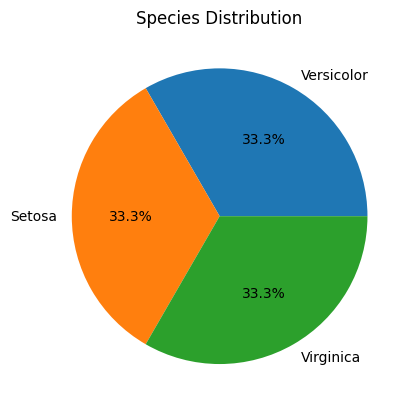

In [459]:
# Visualizing different species
species_counts = df['Species'].value_counts()
labl = ['Versicolor', 'Setosa', 'Virginica']
plt.pie(species_counts, labels=labl, autopct='%1.1f%%')
plt.title('Species Distribution')
plt.show()

### **Chart - 2 Sepal Length**

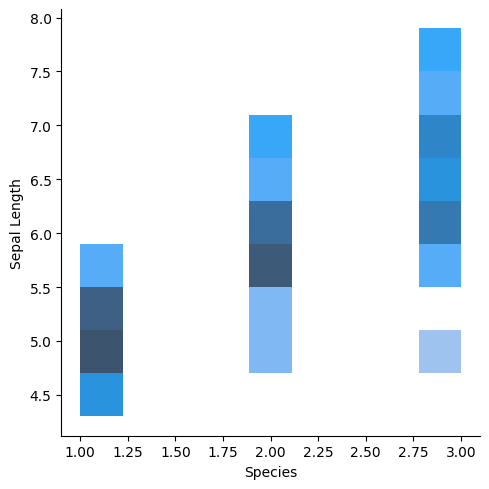

In [460]:
# Create the Distribution plot
sns.displot(x=df['Species'], y= df['SepalLengthCm'])
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

### **Chart - 3 Sepal Width**

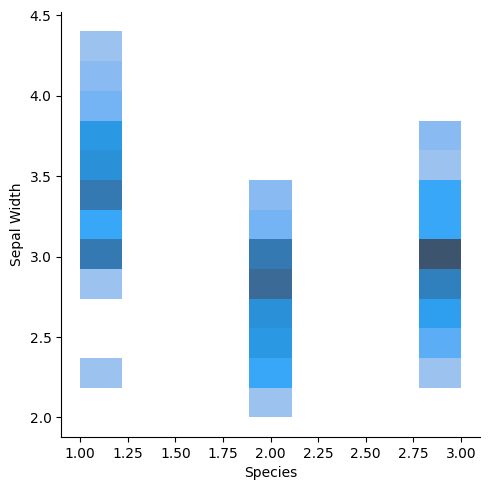

In [461]:
# Create the Distribution plot
sns.displot(x=df['Species'], y= df['SepalWidthCm'])
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.show()

### **Chart - 4 Pedal Length**

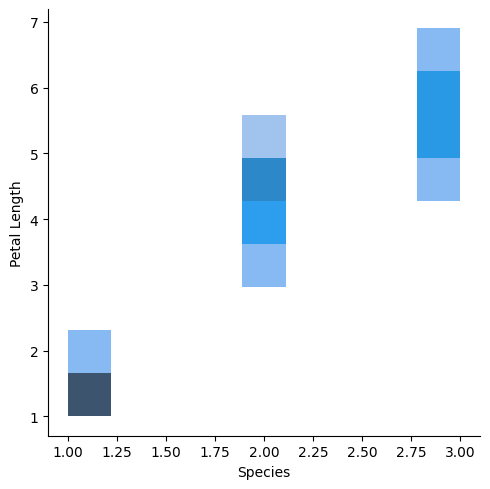

In [462]:
# Create the distribution plot
sns.displot(x=df['Species'], y= df['PetalLengthCm'])
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.show()

### **Chart - 5 Petal Width**

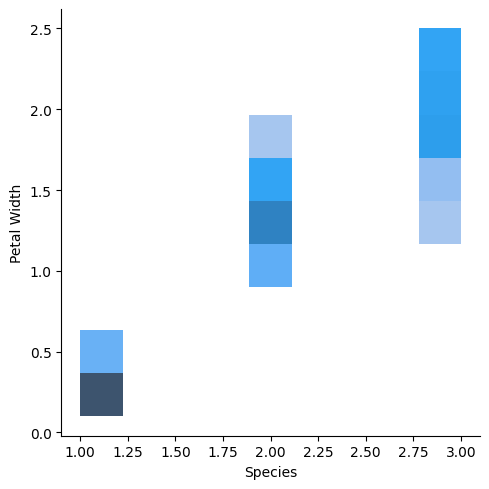

In [463]:
# Create the distribution plot
sns.displot(x=df['Species'], y= df['PetalWidthCm'])
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.show()

#### Chart - 6 - Correlation Heatmap

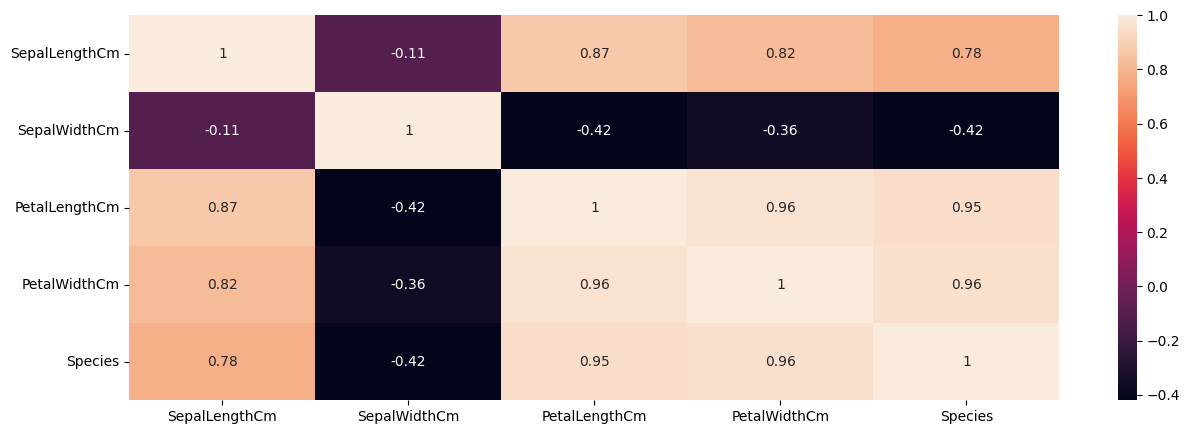

In [464]:
# Checking for multi-collinearity
correlation = df.corr()

plt.figure(figsize=[15, 5])
sns.heatmap(correlation, annot=True, annot_kws={'fontsize': 10})
plt.show()

###**Chart - 7 PairPlot**

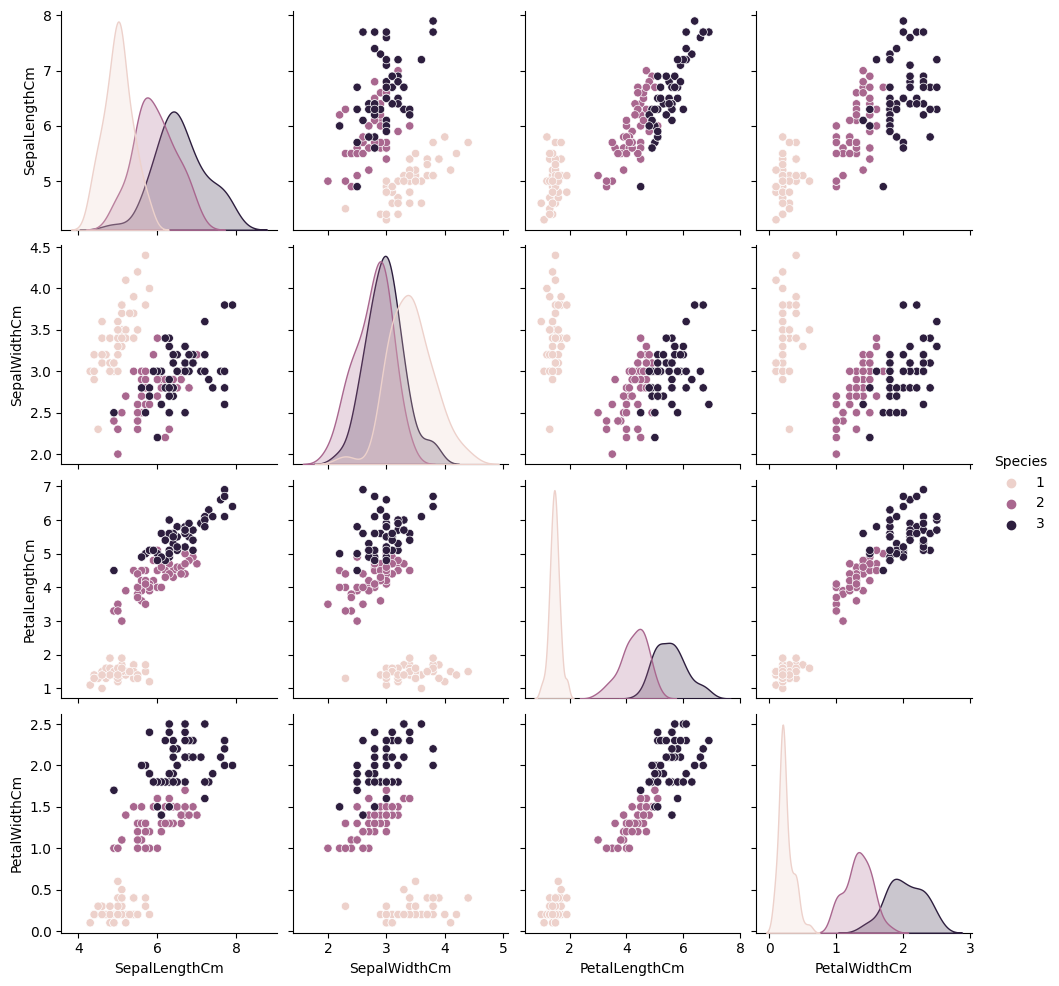

In [465]:
sns.pairplot(df,hue='Species');

## ***5. Feature Engineering & Data Pre-processing***

### Data Scaling

In [466]:
# Scaling the data

# Defining X and y

X = df.drop(['Species'], axis = 1)
y = df['Species']

In [467]:
# Scaling values of X

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [468]:
# Splitting dataset into test and train dataframes

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

## ***6. ML Model Implementation***

## **Model selection**
##1. Logistic Regression
##2. K-Nearest Neighbour
##3. Decision Tree Classification


# **ML Model - 1 - LOGISTIC REGRESSION**

In [469]:
# Logistic Regression Model
lr = LogisticRegression()
# fitting the model
lr.fit(X_train,y_train)

LogisticRegression()

In [470]:
# Getting Prediction
lr_pred_test = lr.predict(X_test)

lr_pre_train = lr.predict(X_train)

In [471]:
# Evaluation Metrics for Train data

# Classification Report
print('Classification report for Logistic Regression (Train set) = \n')
print(classification_report(lr_pre_train, y_train))

Classification report for Logistic Regression (Train set) = 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.88      0.90      0.89        40
           3       0.90      0.88      0.89        40

    accuracy                           0.93       120
   macro avg       0.93      0.92      0.92       120
weighted avg       0.93      0.93      0.92       120



In [472]:
# Evaluation Metrics for test data

# Classification Report
print('Classification report for Logistic Regression (Test set)= \n')
print(classification_report(lr_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.89      1.00      0.94         8
           3       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [473]:
# Generating the confusion matrix
cf_matrix = confusion_matrix(y_test, lr_pred_test)

print(cf_matrix)

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


**Logistic Regression Model Report:**

Logistic Regression Classifier Model had the following metrics:

1. Train Set Accuracy score : 93%
2. Test Set Accuracy score : 97%


Hence, our LR Model is perfoeming well on our Iris Classification Dataset.

# **ML Model - 2.   K-Nearest Neighbour**

In [474]:
# K Nearest Neighbors Model

k=7

clf=KNeighborsClassifier(k)

clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [475]:
# Making the predications

k_pred_train = clf.predict(X_train)
k_pred_test = clf.predict(X_test)

In [476]:
# Evaluation Metrics for Train data

# Classification Report
print('Classification report for KNN Classifier (Train set) = \n')
print(classification_report(k_pred_train, y_train))

Classification report for KNN Classifier (Train set) = 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       0.98      0.93      0.95        43
           3       0.92      0.97      0.95        37

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [477]:
# Evaluation Metrics for test data

# Classification Report
print('Classification report for KNN Classifier (Test set)= \n')
print(classification_report(k_pred_test, y_test))

Classification report for KNN Classifier (Test set)= 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [478]:
# Generate the confusion matrix

cf_matrix = confusion_matrix(y_test, k_pred_test)

print(cf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**KNN Classifier Model Report:**

K-Nearest Neighbors Classifier Model had the following metrics:

1. Train Set Accuracy score : 97%
2. Test Set Accuracy score : 100%


We did not even need to perform Hyperparameter tuning as our KNN Classifier displayed perfect accuracy in predictions on the Test Dataset.

# **ML Model - 3 - Decision Tree Classification**

In [479]:
# ML Model -  Decision Tree Classification Implementation
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [480]:
# Making the predications

dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

In [481]:
# Evaluation Metrics for Train data

# Classification Report
print('Classification report for Decision Tree Classifier (Train set) = \n')
print(classification_report(dt_pred_train, y_train))

Classification report for Decision Tree Classifier (Train set) = 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [482]:
# Evaluation Metrics for test data

# Classification Report
print('Classification report for Decision Tree Classifier (Test set)= \n')
print(classification_report(dt_pred_test, y_test))

Classification report for Decision Tree Classifier (Test set)= 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [483]:
# Generate the confusion matrix

cf_matrix = confusion_matrix(y_test, dt_pred_test)

print(cf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


**Decision Tree Classifier Model Report:**

Decision Tree Classifier Model had the following metrics:

1. Train Set Accuracy score : 100%
2. Test Set Accuracy score : 100%


We did not even need to perform Hyperparameter tuning as our Decision Tree Classifier displayed perfect accuracy in predictions on the Test Dataset.

#**Conclusion**

In [484]:
# Creating a function to get the species from assign value
results = pd.DataFrame({
    'Model': ['Logistic Regression','K-Nearest Neighbour' ,'Decision Tree Classifier'],
    'Score': [0.97,1.00,1.00]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
1.00,K-Nearest Neighbour
1.00,Decision Tree Classifier
0.97,Logistic Regression


For our Iris Flower Sprcies prediction project, the goal was to build a predictive model that can help us estimate the species of Iris Flower based on its specifications.

Our EDA indicates that all the four specifications/features are distributed uniquely for different species, which assists our ML models to predict the species more accurately.

We then developed three Classifier models and observed their validations using mainly confusion matrix and classification reports. From our observations, we conclude that KNN algorithm without hyperparameter tuning yielded the best results in predicting the species of Iris Flowers.

The KNN Classifier model achieved a 100% accuracy score, precision, recall, and F1- score for all classes, which indicates that the model is performing very well on the test set and able to generalize well to all classes. While Decision Tree Classifier also Predict 100% in test dataset but it also predict 100% in train dataset. So, it might have underfitted due to low volume of data.

I would like to conclude that KNN model displayed optimal performance and is able to classify the Iris Flowers accurately into their respective Species category.